In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sci
from scipy.optimize import curve_fit

In [3]:
data_1 = pd.read_csv("Global_active_power.csv",delimiter=",")
data_2 = pd.read_csv("Global_intensity.csv",delimiter=",")
data_3 = pd.read_csv("Global_reactive_power.csv",delimiter=",")
data_4 = pd.read_csv("Voltage.csv",delimiter=",")

In [4]:
data_12 = pd.merge(data_1,data_2)
data_34 = pd.merge(data_3,data_4)
dataFinal = pd.merge(data_12,data_34)

In [5]:
dataFinal

,Datetime,Global_active_power,Global_intensity,Global_reactive_power,Voltage
0,2010-01-01 00:00:00,1.790,7.4,0.236,240.65
1,2010-01-01 00:01:00,1.780,7.4,0.234,240.07
2,2010-01-01 00:02:00,1.780,7.4,0.234,240.15
3,2010-01-01 00:03:00,1.746,7.2,0.186,240.26
4,2010-01-01 00:04:00,1.686,7.0,0.102,240.12
...,...,...,...,...,...
457390,2010-11-26 20:58:00,0.946,4.0,0.000,240.43
457391,2010-11-26 20:59:00,0.944,4.0,0.000,240.00
457392,2010-11-26 21:00:00,0.938,3.8,0.000,239.82
457393,2010-11-26 21:01:00,0.934,3.8,0.000,239.70


In [6]:
dataFinal.to_csv('data.csv')

In [7]:
data = pd.read_csv('data.csv', parse_dates=['Datetime'], index_col=['Datetime'])
data

,Unnamed: 0,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,,
2010-01-01 00:00:00,0,1.790,7.4,0.236,240.65
2010-01-01 00:01:00,1,1.780,7.4,0.234,240.07
2010-01-01 00:02:00,2,1.780,7.4,0.234,240.15
2010-01-01 00:03:00,3,1.746,7.2,0.186,240.26
2010-01-01 00:04:00,4,1.686,7.0,0.102,240.12
...,...,...,...,...,...
2010-11-26 20:58:00,457390,0.946,4.0,0.000,240.43
2010-11-26 20:59:00,457391,0.944,4.0,0.000,240.00
2010-11-26 21:00:00,457392,0.938,3.8,0.000,239.82


In [8]:
data_days = data.resample('D').mean()
data_days

,Unnamed: 0,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,,
2010-01-01,719.5,0.850175,3.537083,0.114817,242.565722
2010-01-02,42229.5,1.176235,4.857778,0.086656,243.631743
2010-01-03,82547.5,0.901894,3.757778,0.090331,241.822778
2010-01-04,125160.5,1.171833,4.879028,0.100322,241.754160
2010-01-05,168359.5,0.916776,3.929861,0.133697,240.647167
...,...,...,...,...,...
2010-12-07,272036.5,0.770538,3.397222,0.198550,240.218646
2010-12-08,316675.5,0.367846,1.623750,0.117429,240.794931
2010-12-09,354089.5,1.119508,4.755694,0.139832,241.619722


In [9]:
data_month = data.resample('M').mean()
data_month

,Unnamed: 0,Global_active_power,Global_intensity,Global_reactive_power,Voltage
Datetime,,,,,
2010-01-31,100170.129182,1.300640,5.430332,0.125182,242.338522
2010-02-28,128339.585175,1.157539,4.836624,0.109467,242.002101
2010-03-31,151173.561849,1.170015,4.920399,0.136368,241.475284
2010-04-30,177796.948276,1.036334,4.363496,0.129557,241.442527
2010-05-31,205370.206741,1.075957,4.551504,0.127221,241.296151
2010-06-30,233408.971551,0.975306,4.170282,0.145525,240.888985
2010-07-31,262055.585639,0.778947,3.337202,0.138093,240.965167
2010-08-31,280754.886724,0.929452,3.954423,0.130815,241.422944
2010-09-30,303424.528462,0.997541,4.223837,0.127700,241.267517


In [10]:
def lineal(x, a, b):
    return a*x+b

In [11]:
popt_month, pcov_month = curve_fit(lineal, data_month["Global_active_power"], data_month["Global_intensity"])
popt_month

array([3.98900025, 0.2466916 ])

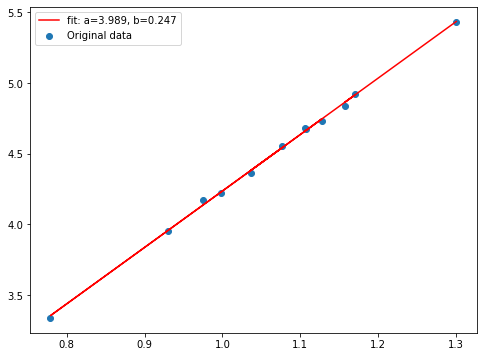

In [12]:
plt.figure(figsize=(8,6))
plt.plot(data_month["Global_active_power"], lineal(data_month["Global_active_power"], *popt_month), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt_month))
plt.scatter(data_month["Global_active_power"],data_month["Global_intensity"],label="Original data")
plt.legend()
plt.show()

In [13]:
popt, pcov = curve_fit(lineal, data["Global_active_power"], data["Global_intensity"])
popt

array([4.18950958, 0.03335361])

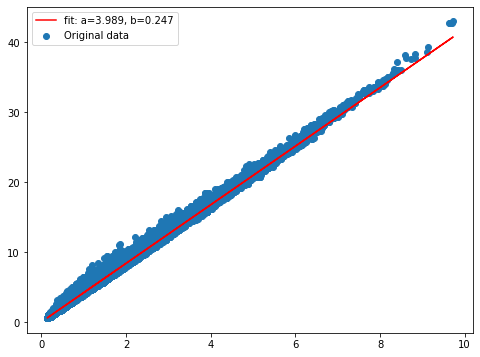

In [14]:
plt.figure(figsize=(8,6))
plt.plot(data["Global_active_power"], lineal(data["Global_active_power"], *popt), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt_month))
plt.scatter(data["Global_active_power"],data["Global_intensity"],label="Original data")
plt.legend()
plt.show()

In [15]:
data_days = data_days.dropna()

In [16]:
popt_days, pcov_days = curve_fit(lineal, data_days["Global_active_power"], data_days["Global_intensity"])
popt_days

array([4.10620168, 0.12181629])

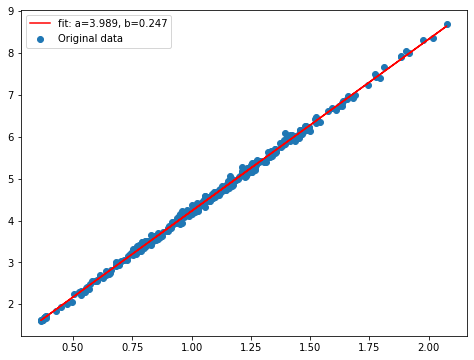

In [17]:
plt.figure(figsize=(8,6))
plt.plot(data_days["Global_active_power"], lineal(data_days["Global_active_power"], *popt_days), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt_month))
plt.scatter(data_days["Global_active_power"],data_days["Global_intensity"],label="Original data")
plt.legend()
plt.show()

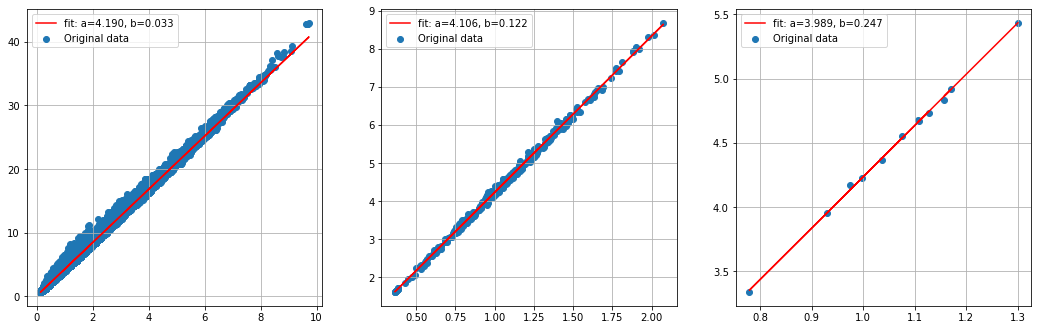

In [18]:
plt.figure(figsize=(18,12))
plt.subplot(231)
plt.plot(data["Global_active_power"], lineal(data["Global_active_power"], *popt), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.scatter(data["Global_active_power"],data["Global_intensity"],label="Original data")
plt.legend()
plt.grid()
plt.subplot(232)
plt.plot(data_days["Global_active_power"], lineal(data_days["Global_active_power"], *popt_days), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt_days))
plt.scatter(data_days["Global_active_power"],data_days["Global_intensity"],label="Original data")
plt.legend()
plt.grid()
plt.subplot(233)
plt.plot(data_month["Global_active_power"], lineal(data_month["Global_active_power"], *popt_month), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt_month))
plt.scatter(data_month["Global_active_power"],data_month["Global_intensity"],label="Original data")
plt.legend()
plt.grid()
plt.show()